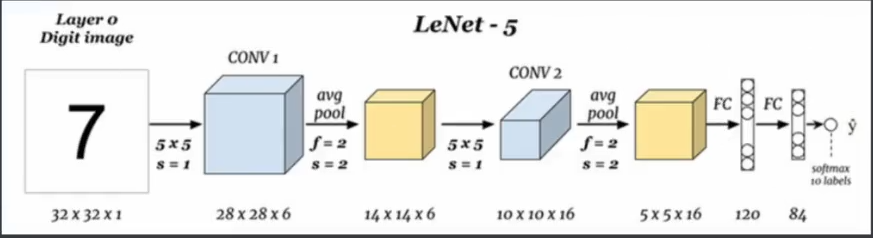

In [1]:
import torch
from torch import nn
from torch.nn import functional as F

In [2]:
data = torch.ones(size=(10,1,32,32))

In [3]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        #池化层采用的是MaxPool！！
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool1 = nn.AvgPool2d(kernel_size=2,
                                  stride=2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.pool2 = nn.AvgPool2d(kernel_size=2,
                                  stride=2)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)

    def forward(self,x):
        x = F.tanh(self.conv1(x))
        x = self.pool1(x)
        x = F.tanh(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1,5*5*16) #-1 不关心
        x = F.tanh(self.fc1(x)) #(samples, features)
        output = F.softmax(self.fc2(x),dim=1)        

In [4]:
net = Model()

In [5]:
net(data) 

c:\Users\23197\.conda\envs\torch\lib\site-packages\torch\nn\functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [6]:
from torchinfo import summary

In [7]:
net = Model()

In [8]:
summary(net,input_size=(10,1,32,32))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    --                        --
├─Conv2d: 1-1                            [10, 6, 28, 28]           156
├─AvgPool2d: 1-2                         [10, 6, 14, 14]           --
├─Conv2d: 1-3                            [10, 16, 10, 10]          2,416
├─AvgPool2d: 1-4                         [10, 16, 5, 5]            --
├─Linear: 1-5                            [10, 120]                 48,120
├─Linear: 1-6                            [10, 84]                  10,164
Total params: 60,856
Trainable params: 60,856
Non-trainable params: 0
Total mult-adds (M): 4.22
Input size (MB): 0.04
Forward/backward pass size (MB): 0.52
Params size (MB): 0.24
Estimated Total Size (MB): 0.81

In [9]:
from torch_receptive_field import receptive_field

In [10]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,
                                  stride=2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,
                                  stride=2)
        #self.fc1 = nn.Linear(5*5*16,120)
        #self.fc2 = nn.Linear(120,84)

    def forward(self,x):
        x = F.tanh(self.conv1(x))
        x = self.pool1(x)
        x = F.tanh(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1,5*5*16) #-1 不关心
        #x = F.tanh(self.fc1(x)) #(samples, features)
        #output = F.softmax(self.fc2(x),dim=1)        

In [11]:
net = LeNet5().cuda()

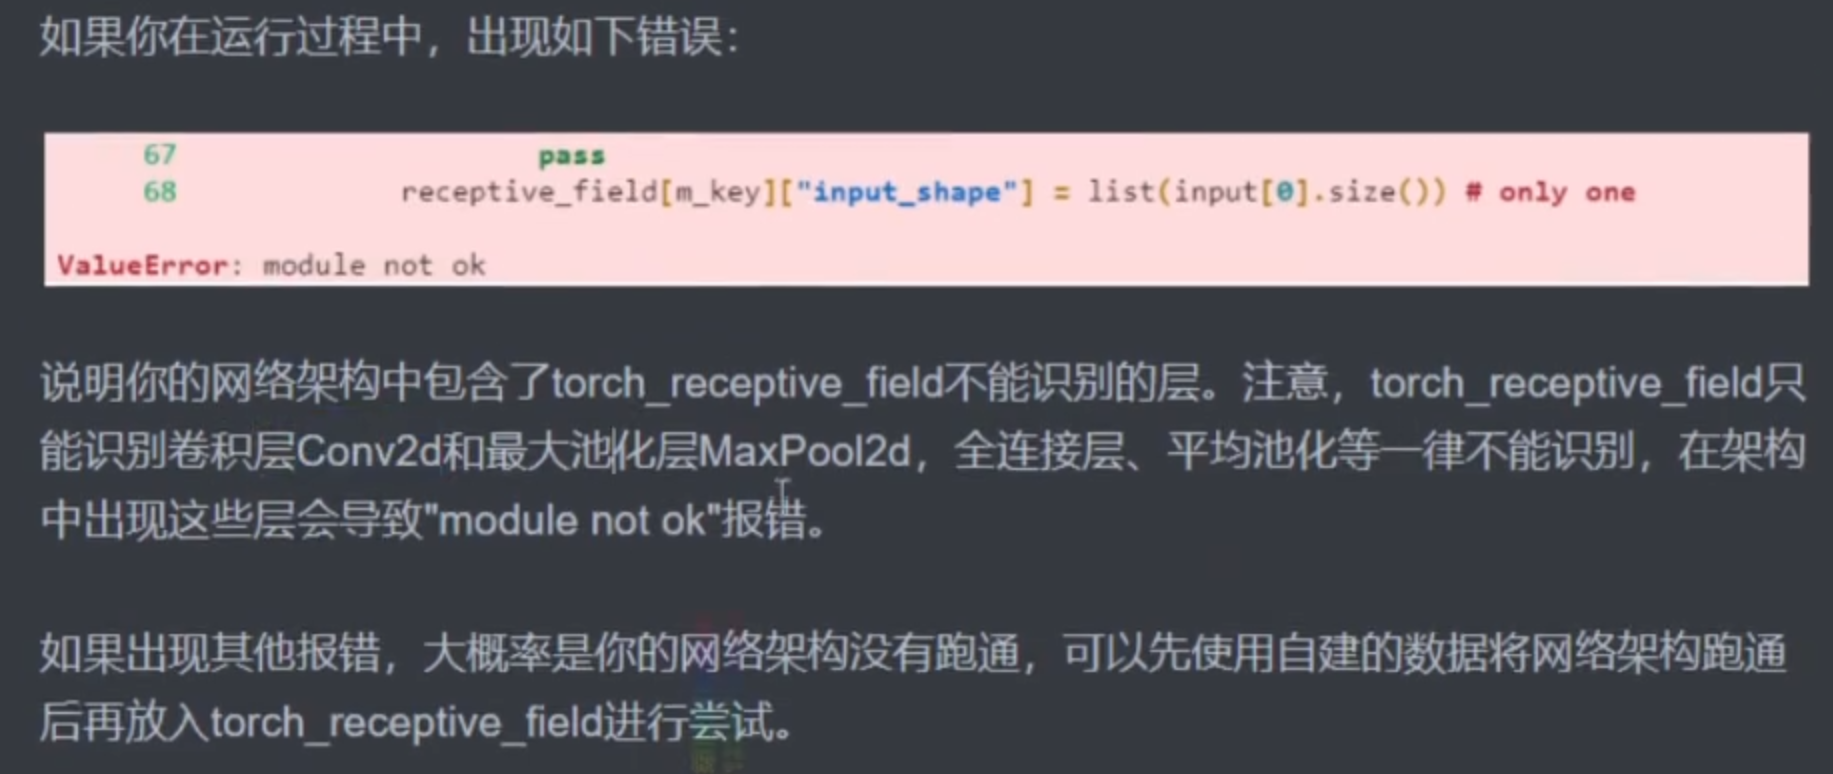

In [12]:
receptive_field(net,(1,32,32))

------------------------------------------------------------------------------
        Layer (type)    map size      start       jump receptive_field 
        0               [32, 32]        0.5        1.0             1.0 
        1               [28, 28]        2.5        1.0             5.0 
        2               [14, 14]        3.0        2.0             6.0 
        3               [10, 10]        7.0        2.0            14.0 
        4                 [5, 5]        8.0        4.0            16.0 


OrderedDict([('0',
              OrderedDict([('j', 1.0),
                           ('r', 1.0),
                           ('start', 0.5),
                           ('conv_stage', True),
                           ('output_shape', [-1, 1, 32, 32])])),
             ('1',
              OrderedDict([('j', 1.0),
                           ('r', 5.0),
                           ('start', 2.5),
                           ('input_shape', [-1, 1, 32, 32]),
                           ('output_shape', [-1, 6, 28, 28])])),
             ('2',
              OrderedDict([('j', 2.0),
                           ('r', 6.0),
                           ('start', 3.0),
                           ('input_shape', [-1, 6, 28, 28]),
                           ('output_shape', [-1, 6, 14, 14])])),
             ('3',
              OrderedDict([('j', 2.0),
                           ('r', 14.0),
                           ('start', 7.0),
                           ('input_shape', [-1, 6, 14, 14]),
            